# HW7 32140704 김성환

1. scypy로 엑셀 파일을 리드해서 numpy로 배열하는 방법

In [ ]:
import numpy as np
import xlwings as xw
import pandas as pd

path = 'C:/Users/pc/Desktop/usb 저장/4_B.xlsx'
path2 = "renamed_" + path

while True:
    try:
        df = pd.read_excel(path, engine='openpyxl')
    except Exception as e:
        print("Failed to open workbook; error: ")
        print(e)
        wingsbook = xw.Book(path)
        wingsapp = xw.apps.active
        wingsbook.save(path2)
        wingsapp.quit()

        path = path2
    else:
        break

B=df.values
# 여기까지가 판다스로 데이터를 받은 다음 넘파이 어레이로 변환하는 과i

# p160 4,5)

f(x) = 5.1000


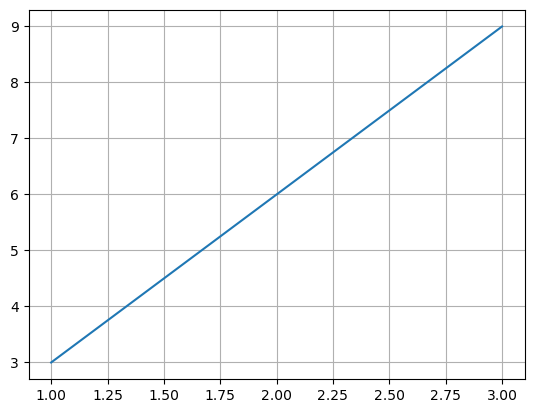

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def secint(x):
    b0=f0
    b1=(f1-f0)/(x1-x0)
    b2=((f2-f1)/(x2-x1) - (f1-f0)/(x1-x0))/(x2-x0)
    
    eq=b0 + b1*(x-x0) + b2*(x-x0)*(x-x1)
    
    return eq

x0=1.
x1=2
x2=3
f0=3.
f1=6
f2=9
xw=1.7

print(f'f(x) = {secint(xw):0.4f}')

x=np.linspace(1,3,1000)
y=secint(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

선형함수로 된것 처럼 보이나, 데이터자체가 선형이기 때문에 2차 계수가 0이 나온 것이다. 데이터값을 바꿔서 주면 원래대로 포물선 형태가 나온다. 그리드는 다양하게 할 수 있지만, 굳이 그렇게 할 이유가 없다.

In [19]:
import numpy as np
import bokeh as bk

x0=1.
x1=2
x2=3
f0=9.
f1=2
f2=4
xw=1.8

print(f'f(x) = {secint(xw):0.4f}')

from bokeh.plotting import figure
from bokeh.io import show, output_notebook

p=figure(plot_width=400, plot_height=300)
x=np.linspace(1,3,1000)
y=secint(x)
p.line(x,y)

output_notebook()
show(p)

f(x) = 2.6800


Loading BokehJS ...

bokeh가 그래프가 훨신 더 깔끔한 것을 확인할 수 있고, 또한 동적이다.

# p182 2,3)

기존에 해왔던 방식에서 그래프를 추가로 그리는 것이 의미가 없다

In [21]:
import numpy as np

def f(x):
    eq=x**3.+1.
    return eq

n=5
a=2.
b=1.
h=(b-a)/n
x=np.linspace(a,b,n+1) #number of point

sums=0.
for i in range(n):
    sums += (f(x[i])+f(x[i+1]))/2.
sums = h*sums
print(f'Inte = {sums:0.4f}')

Inte = -4.7800


In [22]:
import numpy as np

def f(x):
    eq=x*np.cos(x)
    return eq

n=6
a=0
b=4.
h=(b-a)/n
x=np.linspace(a,b,n+1)

sums=f(x[0]) + f(x[n])

for i in range(1,n):
    if i%2 == 0:
        sums += 2*f(x[i])
    else:
        sums += 4*f(x[i])
sums = h*sums/3
print(f'Inte = {sums:0.4f}')

Inte = -4.6784


# p203 1,8)

N = 1, c = 2.000000
error = 0.5000

N = 2, c = 1.500000
error = 0.3333

N = 3, c = 1.750000
error = 0.1429

N = 4, c = 1.625000
error = 0.0769

N = 5, c = 1.687500
error = 0.0370



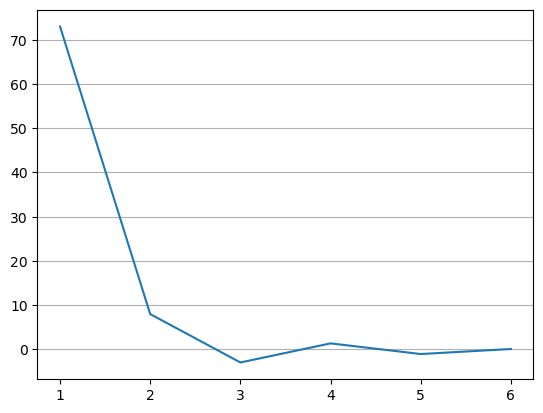

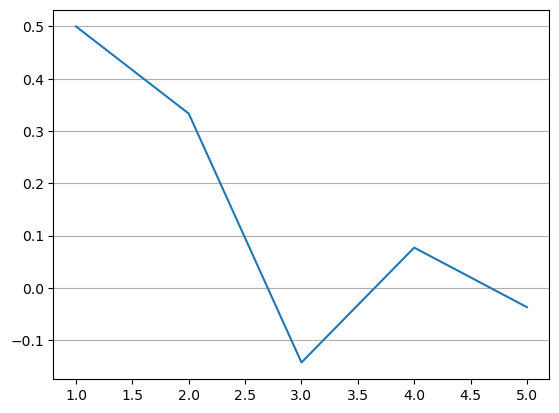

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    eq=x**4.-8
    return eq

a=1.
b=5
c=(a+b)/2.

ans=np.array([f(c)])
er=np.array([])
i=0

error=100
while abs(error)>0.05:
    cpast=c
    
    if f(a)*f(c)<0:
        b=c
    elif f(b)*f(c)<0:
        a=c
    else : 
        print("No sign change")
    
    c=(a+b)/2.
    error=(cpast-c)/c
    
    plus=np.array([f(c)])
    ans=np.append(ans, plus)
    eplus=np.array([error])
    er=np.append(er, eplus)
    
    i=i+1
    print(f'N = {i}, c = {c:0.6f}')
    print(f'error = {abs(error):0.4f}\n')

x=np.linspace(1,len(ans),len(ans))
xer=np.linspace(1,len(er),len(er))

plt.plot(x,ans)
plt.grid(True, axis='y')
plt.show()
plt.plot(xer,er)
plt.grid(True, axis='y')
plt.show()

sympy를 통한 자체 미분방법은 예로 이러하다

In [29]:
import sympy as sp
#sympy와 scipy를 동시에 임포트 할 일은 없으므로, 동일한 철자를 사용하여도 무관하다.

x=sp.symbols('x')
eq=x**2 + sp.sin(x) -0.1
deq=sp.diff(eq,x)
deq

2*x + cos(x)

In [30]:
import numpy as np
import bokeh as bk

def f(x):
    eq=x**2. + np.sin(x) +.1
    #.1로 쓰면 쓰기는 편하지만 가독성이 안좋다
    return eq
def df(x):
    deq=2.*x + np.cos(x)
    return deq

maxN=100
xo=0
ans=np.array([f(xo)])
er=np.array([])

for k in range(maxN):
    xnew=xo-f(xo)/df(xo)
    print(f'N = {k+1} , x = {xnew:0.6f}')
    error = (xo-xnew)/xo
    
    plus=np.array([xo])
    ans=np.append(ans, plus)
    eplus=np.array([error])
    er=np.append(er, eplus)
    
    if abs(error)<0.05:
        break
    xo=xnew
    print(f'error = {abs(error):0.4f}\n')

x=np.linspace(1,len(ans),len(ans))
xer=np.linspace(1,len(er),len(er))

from bokeh.plotting import figure
from bokeh.io import show, output_notebook

p1=figure(plot_width=400, plot_height=300)
p1.line(x,ans)
output_notebook()
show(p1)

p2=figure(plot_width=400, plot_height=300)
p2.line(xer,er)
output_notebook()
show(p2)

N = 1 , x = -0.100000
error = inf

N = 2 , x = -0.112788
error = 0.1279

N = 3 , x = -0.113012


C:\Users\pc\AppData\Local\Temp\ipykernel_11620\3564029358.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  error = (xo-xnew)/xo


Loading BokehJS ...

Loading BokehJS ...

zero division error

# p252 6,9)

In [35]:
import numpy as np
import scipy as sp

A=np.array([[9,-1,1],
            [-1,5,-1],
            [1,-1,2]])
b=np.array([4,0,9])

P,L,U=sp.linalg.lu(A)
invL=np.linalg.inv(L)
invU=np.linalg.inv(U)

x=invU@(invL@b)
np.set_printoptions(precision=2)
print(x)

[-5.55e-17  1.00e+00  5.00e+00]


유효숫자를 잡는것 말고 정수형으로 반올림 하는 방법은 찾지 못하였다.

In [34]:
import numpy as np
import scipy as sp

A=np.array([[2,-1,1],
            [-1,3,-1],
            [1,-1,2]])
b=np.array([4,6,15])

L=sp.linalg.cholesky(A, lower=True)
LT=np.transpose(L)
invLT=np.linalg.inv(LT)
invL=np.linalg.inv(L)

x=invLT@(invL@b)
np.set_printoptions(precision=2)
print(x)

[-0.57  5.29 10.43]


행렬은 그래프를 따로 필요로 하지 않으며, sympy나 LaTeX로 도시하는 법 역시 찾지 못하였다.

#### p276 >> 해당하는 에러를 고치지 못함

# p308 6,7)

8.0 2.4


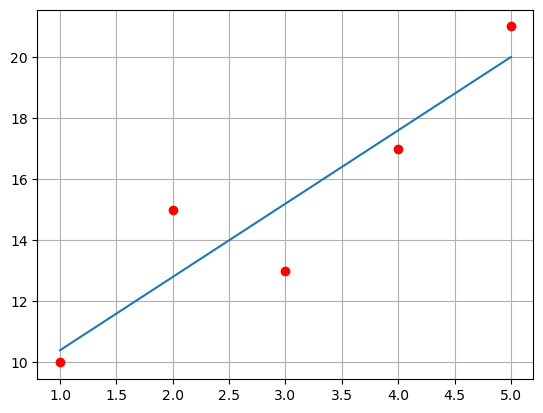

In [43]:
import numpy as np

x=np.array([1,2,3,4,5])
y=np.array([10,15,13,17,21])
n=len(x)

beta0_nom = np.sum(y)*np.sum(x**2.) - np.sum(x)*np.sum(x*y)
denom = n*np.sum(x**2.) - np.sum(x)**2
#denom 수식이 거꾸로 된 것 같긴 하나 그대로 시도합니다
b0=beta0_nom/denom

beta1_nom = n*np.sum(x*y) - np.sum(x)*np.sum(y)
b1=beta1_nom/denom

print(b0, b1)

import matplotlib.pyplot as plt
plt.plot(x,y,'ro')
plt.grid(True)

xa=np.linspace(min(x),max(x),1000)
ya=b0 + b1*xa
plt.plot(xa,ya)
plt.show()

In [54]:
import numpy as np
import scipy as sp
import bokeh as bk

x=np.array([1,2,3,4,5])
y=np.array([8.5, 7, 6, 4.5, 3])

from scipy.optimize import curve_fit

def f(x, a, b):
    return a*x + b

popt, pcov = curve_fit(f, x, y)
print(popt)

from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import row

p1=figure(plot_width=400, plot_height=300)
p1.square(x,y)

xa=np.linspace(min(x),max(x),1000)
ya=popt[1] + popt[0]*xa

p2=figure(plot_width=400, plot_height=300)
p2.line(xa,ya)
output_notebook()
show(row(p1,p2))

[-1.35  9.85]


Loading BokehJS ...

두 그래프를 한 그래프에 그리는 방법은 아직 조사하지 못하였습니다.